# Mašinsko učenje
# Projekat 3 - Veštačke neuronske mreže
# Nikola Vukotić 1401, Željko Balanović 1533¶
## Prognoza vrste raka dojke
### Dataset: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?select=breast-cancer.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import recall_score
from mlxtend.plotting import plot_confusion_matrix

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold
import tensorflow.keras.backend as kb
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: >

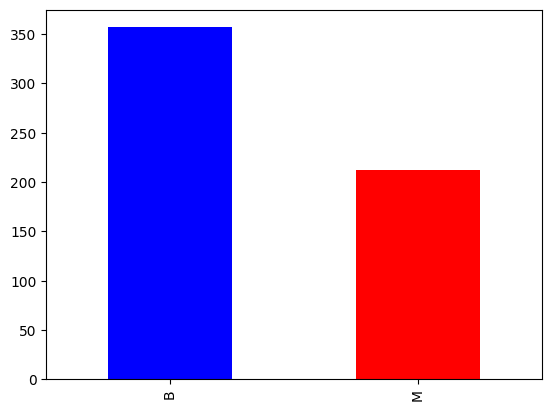

In [5]:
df.diagnosis.value_counts().plot(kind="bar", color=['blue', 'red'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df = df.drop(columns=['id'])

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


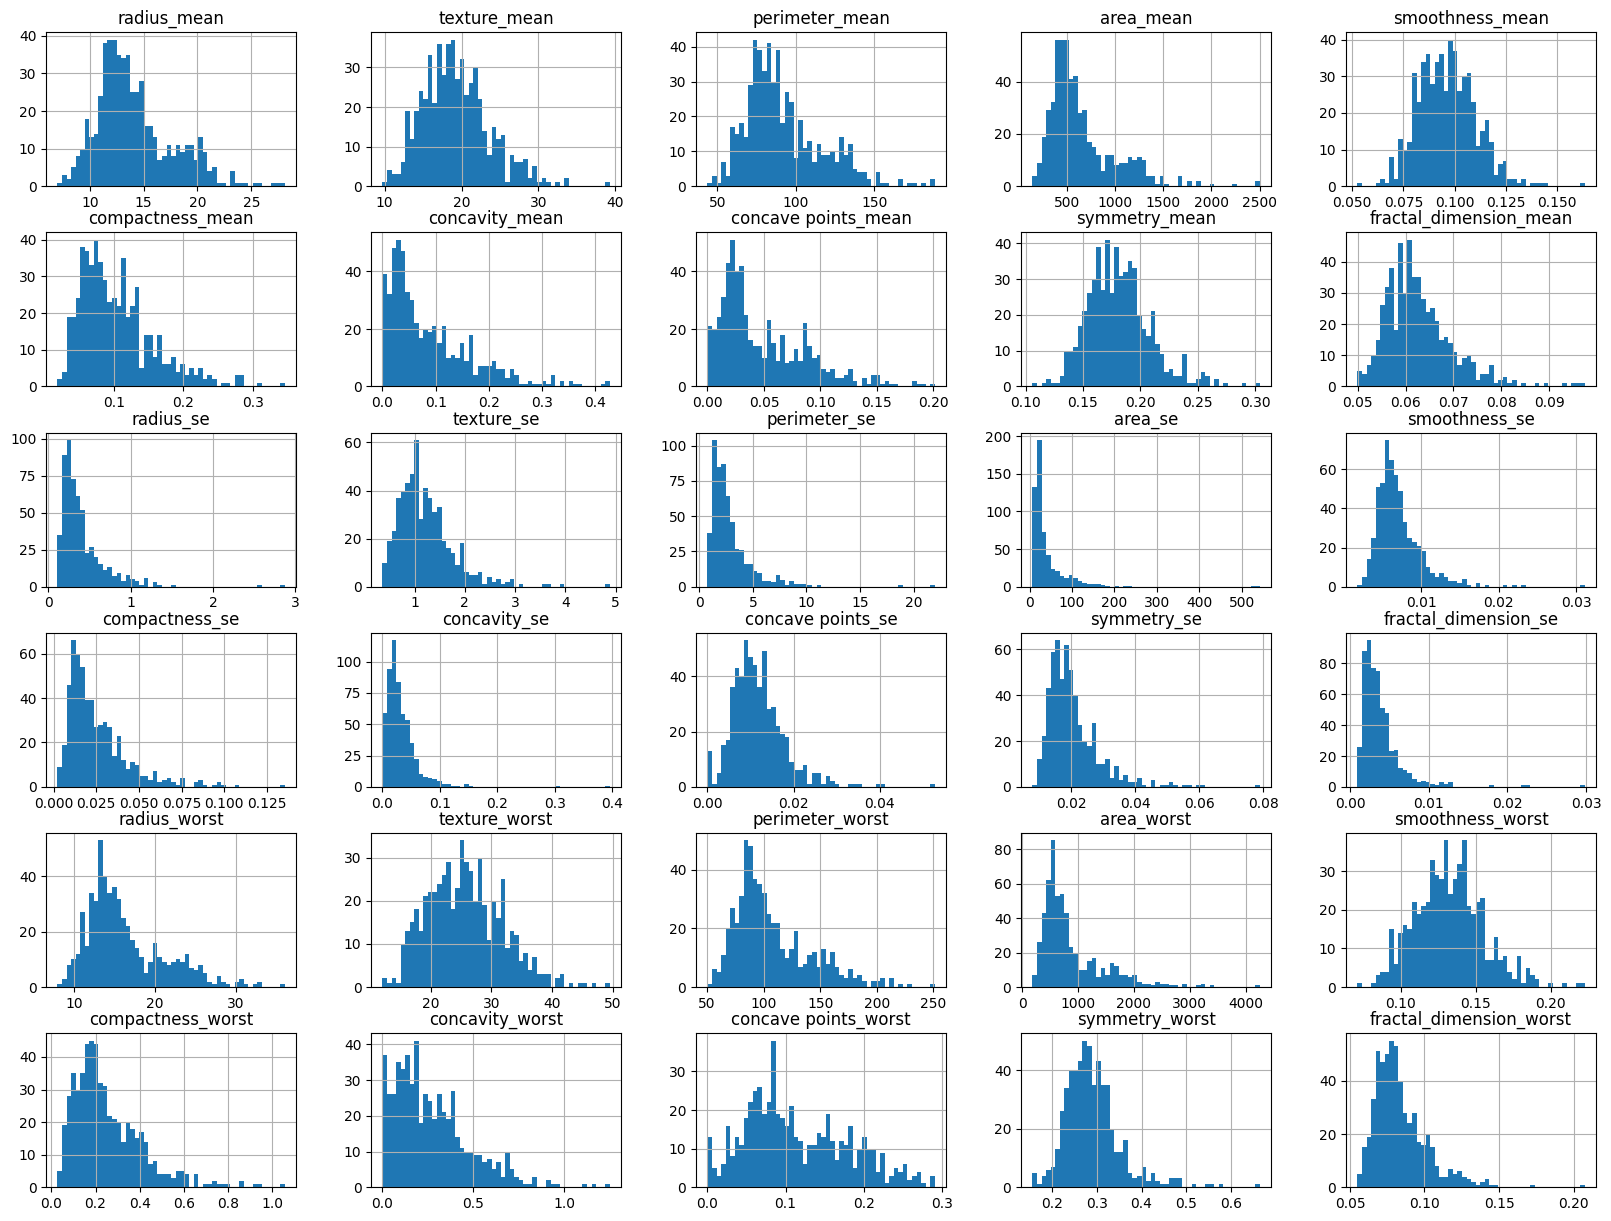

In [10]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

/var/folders/w9/1yzd3jfs0s18rk7_92qw2ctm0000gp/T/ipykernel_1313/1843139857.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


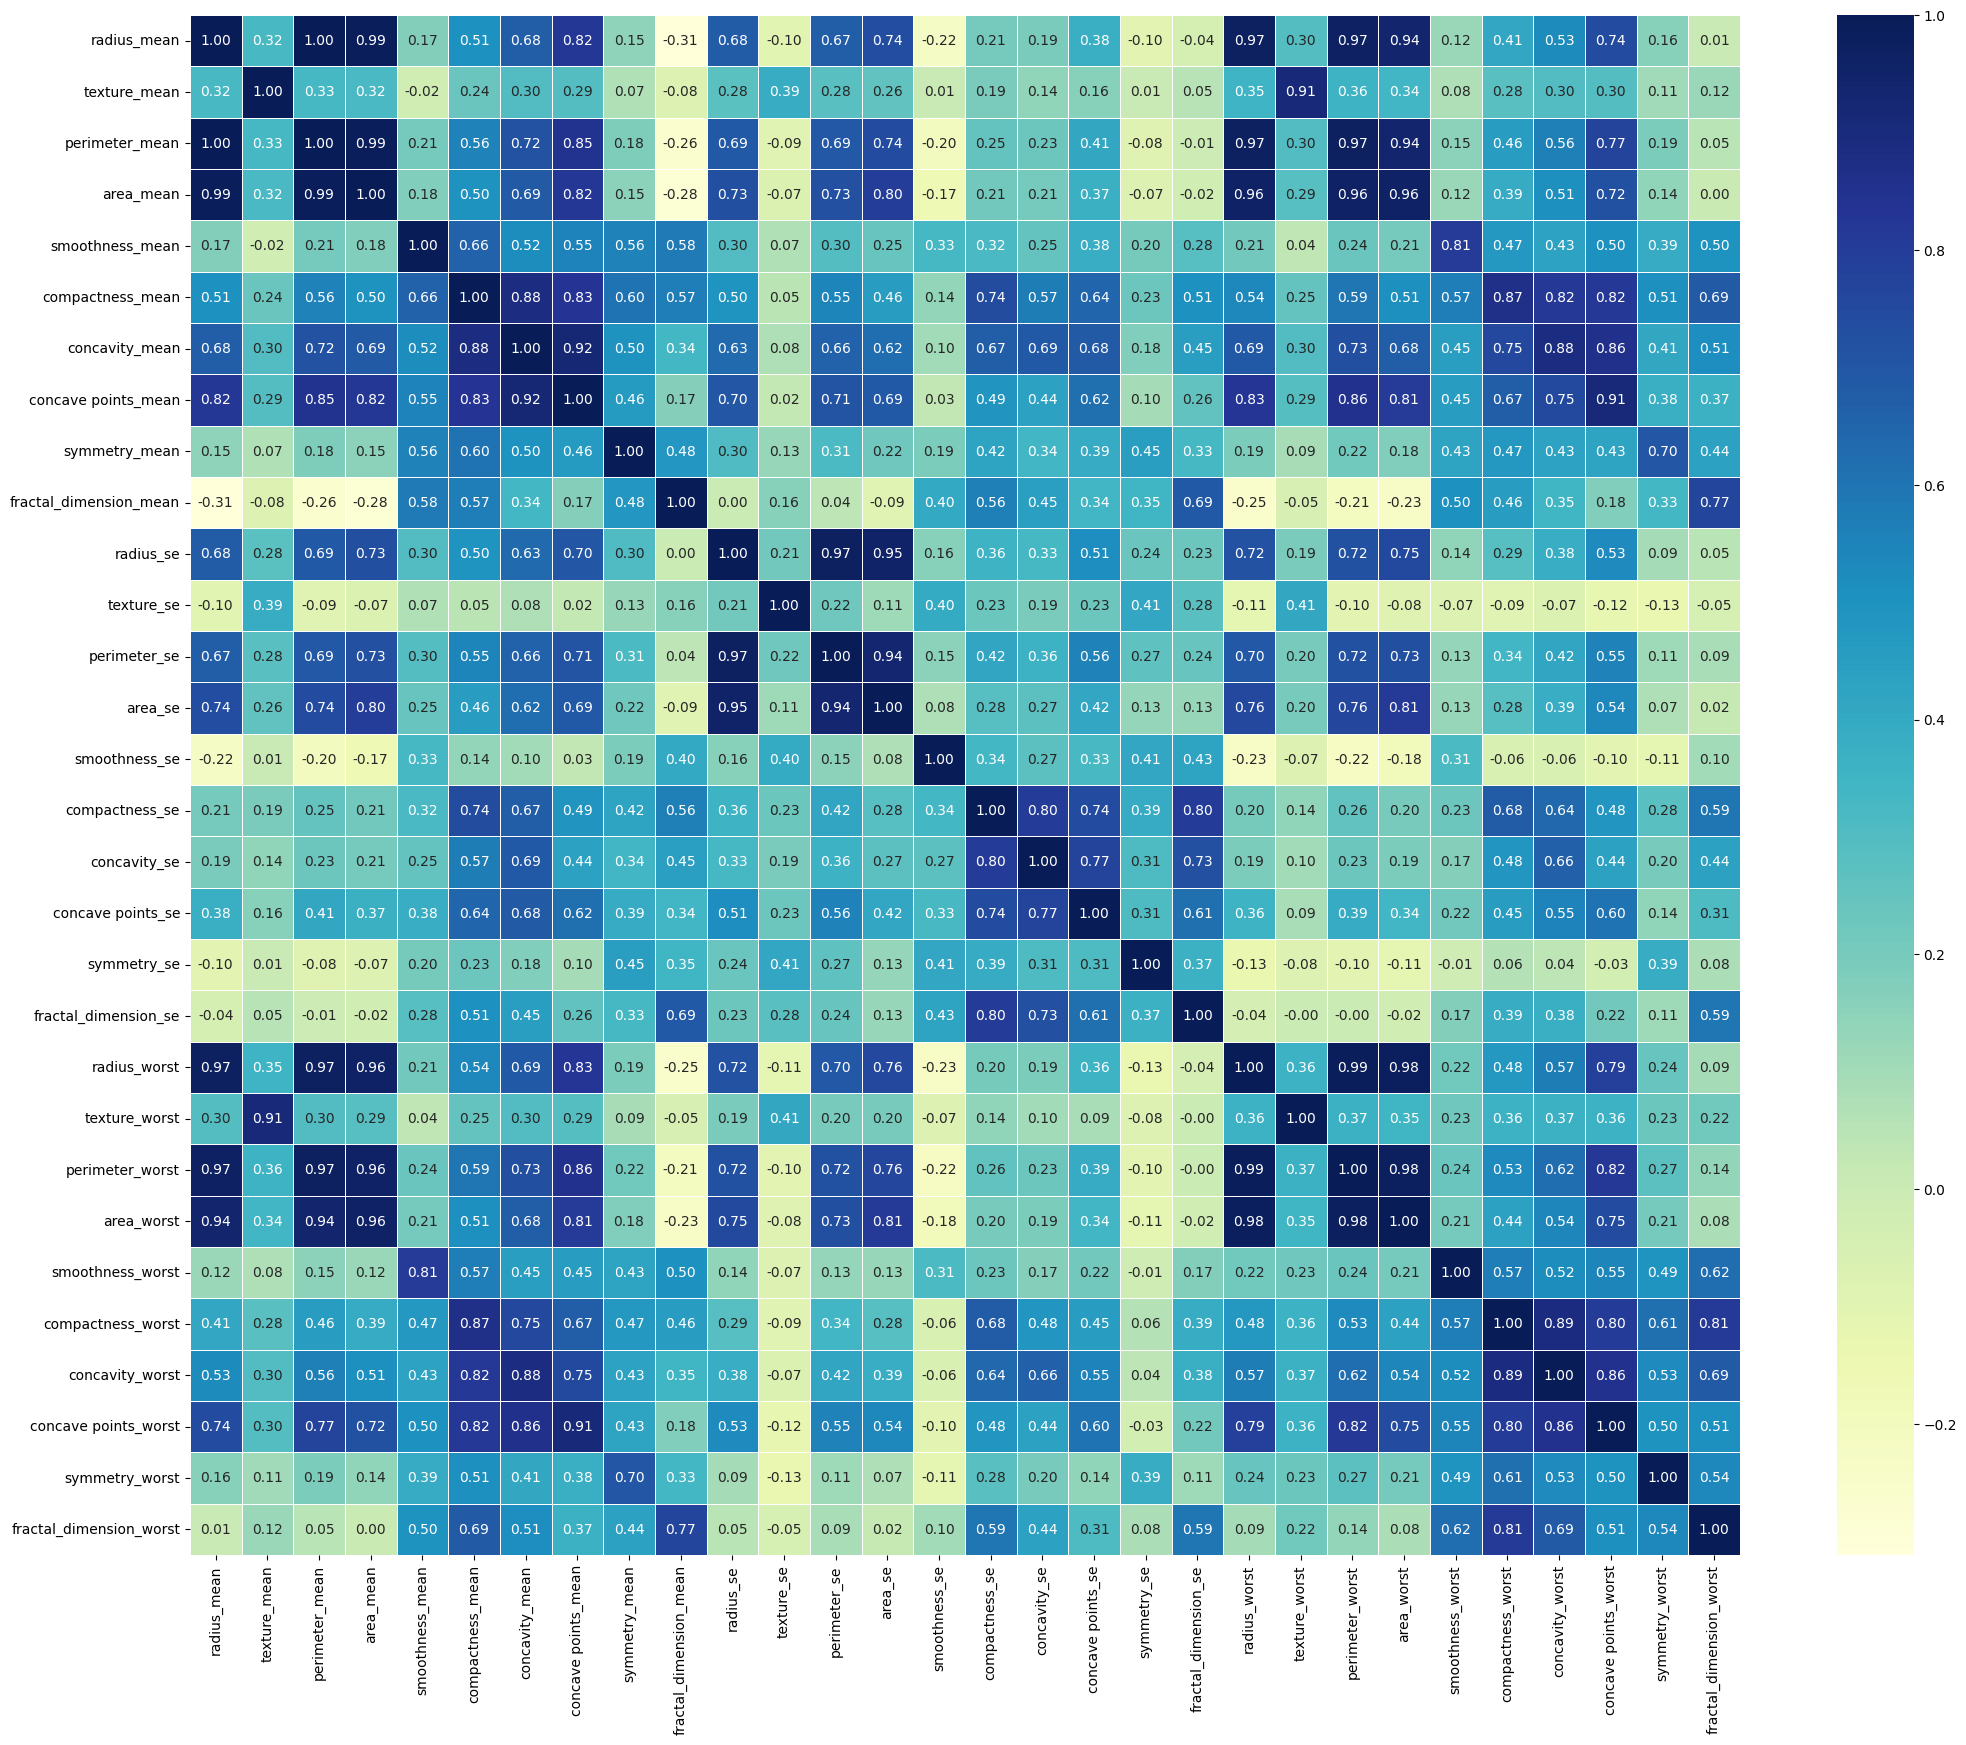

In [11]:
corr_matrix = df.corr()
fix, ax = plt.subplots(figsize=(25,20))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap='YlGnBu')

## Data preprocessing

In [12]:
X = df.drop(columns='diagnosis')
y = df.diagnosis

In [13]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [15]:
X = X.iloc[:,:].values
y = y.iloc[:].values

In [16]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [17]:
y[:20]

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B'], dtype=object)

In [18]:
for i in range(len(y)):
  if (y[i] == 'M'):
    y[i] = 1
  else:
    y[i] = 0

In [19]:
y[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=object)

### Podela dataseta u trening i test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print('Num of train instances:', len(X_train))
print('Num of test instances:', len(X_test))

Num of train instances: 455
Num of test instances: 114


<Axes: xlabel='0'>

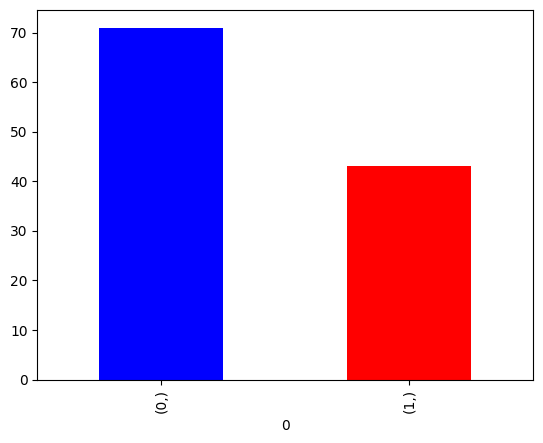

In [183]:
test_df = pd.DataFrame(y_test)
test_df.value_counts().plot(kind="bar", color=['blue', 'red'])

### Feature scaling

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling

In [23]:
def get_pred_labels(ann, X_test):
  y_pred = ann.predict(X_test)
  for i in range(len(y_pred)):
    y_pred[i] = 1 if (y_pred[i] > 0.5) else 0
  y_pred = np.concatenate(y_pred, axis=0).astype(int)
  return y_pred


def show_conf_matrix(y_pred):
  cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))
  plt.figure()
  plot_confusion_matrix(cm, figsize=(10,6), hide_ticks=True, cmap=plt.cm.Blues)
  plt.xticks(range(2), ['Benign', 'Malignant'], fontsize=16)
  plt.yticks(range(2), ['Benign', 'Malignant'], fontsize=16)
  plt.show()

### Rucno menjanje learning rate-a po clanku [1]
### Po clanku [1] su isprobani razliciti oprimiser-i


[1] Jason Brownlee PhD, https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

## 1. ANNS USING Adam optimiser

### ANN1

In [24]:
ann1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer
    tf.keras.layers.Dense(units=30, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [25]:
ann1.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
                                                  patience=3)

In [27]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

In [28]:
BATCH_SIZE = 32
EPOCHS = 100
ann1_hist = ann1.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100


2023-03-06 10:14:47.354897: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


15/15 [==============================] - 0s 631us/step - loss: 0.5786 - accuracy: 0.6923
Epoch 2/100
15/15 [==============================] - 0s 525us/step - loss: 0.3533 - accuracy: 0.9055
Epoch 3/100
15/15 [==============================] - 0s 663us/step - loss: 0.2453 - accuracy: 0.9385
Epoch 4/100
15/15 [==============================] - 0s 510us/step - loss: 0.1902 - accuracy: 0.9451
Epoch 5/100
15/15 [==============================] - 0s 550us/step - loss: 0.1555 - accuracy: 0.9495
Epoch 6/100
15/15 [==============================] - 0s 581us/step - loss: 0.1325 - accuracy: 0.9516
Epoch 7/100
15/15 [==============================] - 0s 469us/step - loss: 0.1159 - accuracy: 0.9560
Epoch 8/100
15/15 [==============================] - 0s 540us/step - loss: 0.1050 - accuracy: 0.9582
Epoch 9/100
15/15 [==============================] - 0s 479us/step - loss: 0.0958 - accuracy: 0.9604
Epoch 10/100
15/15 [==============================] - 0s 607us/step - loss: 0.0885 - accuracy: 0.9648
E

### Evaluating ANN1

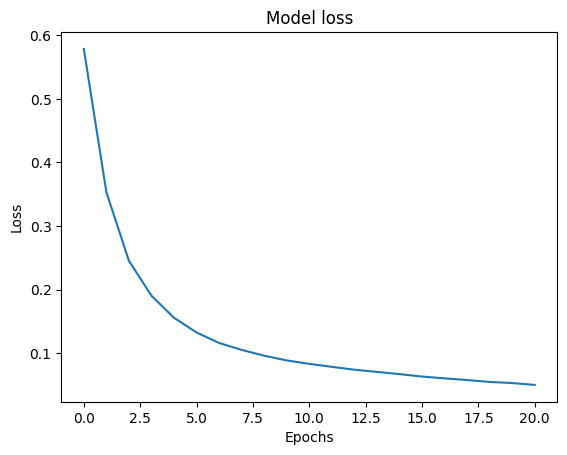

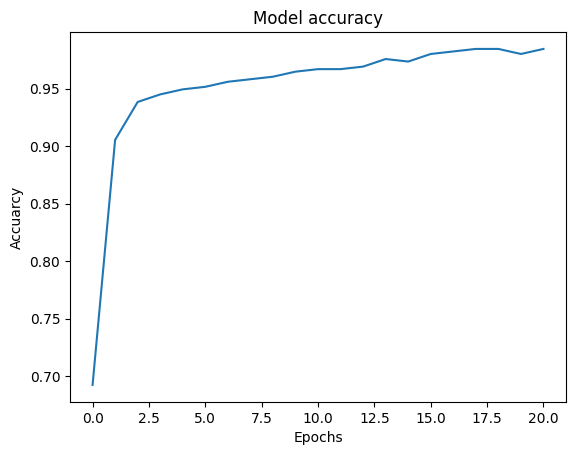

In [29]:
plt.plot(ann1_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann1_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [30]:
y_pred = get_pred_labels(ann1, X_test)

4/4 [==============================] - 0s 631us/step


In [31]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

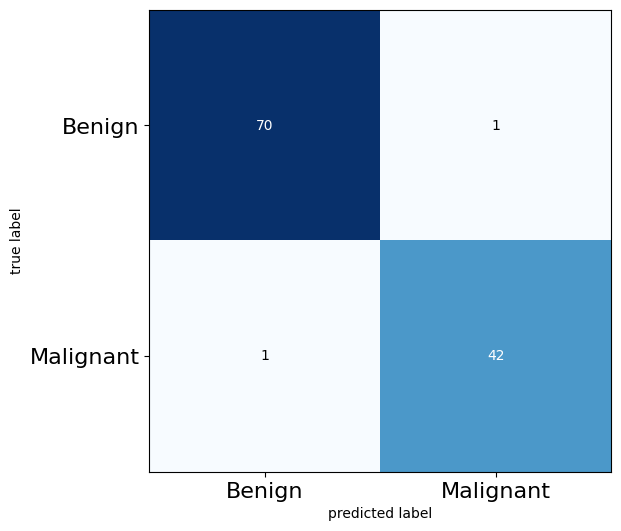

In [32]:
show_conf_matrix(y_pred)

In [33]:
acc1 = accuracy_score(y_test.astype(int), y_pred.astype(int))
acc1

0.9824561403508771

In [34]:
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## ANN2 

In [35]:
ann2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=16, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dropout(rate=0.1), 
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [36]:
ann2.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [37]:
ann2_hist = ann2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 649us/step - loss: 0.7107 - accuracy: 0.4857
Epoch 2/100
15/15 [==============================] - 0s 674us/step - loss: 0.5383 - accuracy: 0.8154
Epoch 3/100
15/15 [==============================] - 0s 591us/step - loss: 0.4181 - accuracy: 0.8813
Epoch 4/100
15/15 [==============================] - 0s 562us/step - loss: 0.3111 - accuracy: 0.9297
Epoch 5/100
15/15 [==============================] - 0s 605us/step - loss: 0.2399 - accuracy: 0.9451
Epoch 6/100
15/15 [==============================] - 0s 547us/step - loss: 0.1991 - accuracy: 0.9407
Epoch 7/100
15/15 [==============================] - 0s 591us/step - loss: 0.1611 - accuracy: 0.9538
Epoch 8/100
15/15 [==============================] - 0s 482us/step - loss: 0.1481 - accuracy: 0.9582
Epoch 9/100
15/15 [==============================] - 0s 564us/step - loss: 0.1288 - accuracy: 0.9714
Epoch 10/100
15/15 [==============================] - 0s 479us/step - loss: 0.1154 - accura

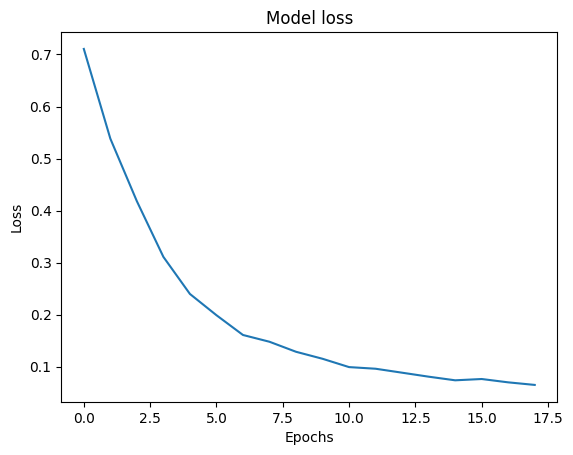

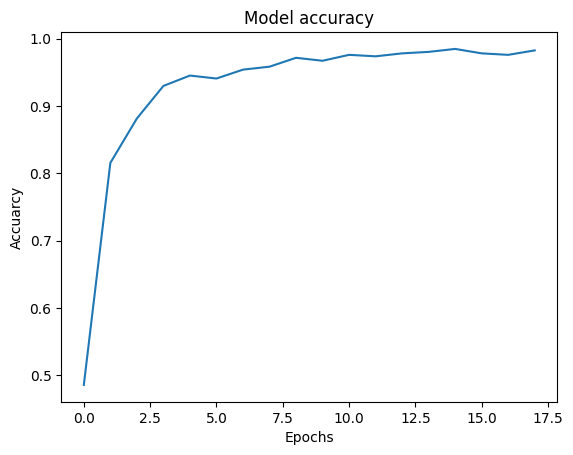

In [38]:
plt.plot(ann2_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann2_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [39]:
y_pred2 = get_pred_labels(ann2, X_test)

4/4 [==============================] - 0s 617us/step


<Figure size 640x480 with 0 Axes>

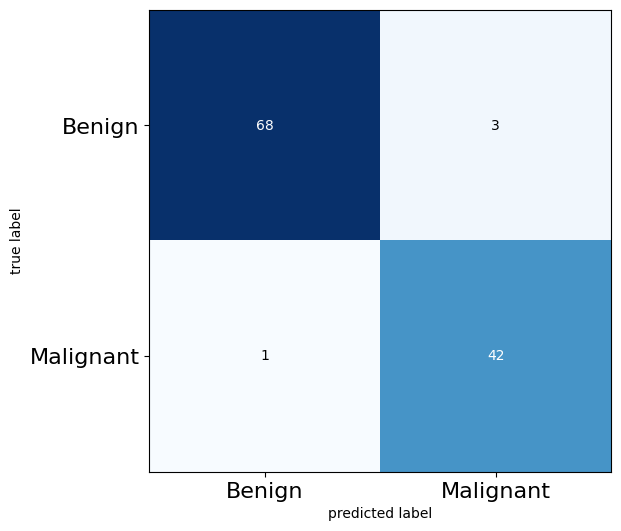

In [40]:
show_conf_matrix(y_pred2)

In [41]:
acc2 = accuracy_score(y_test.astype(int), y_pred2.astype(int))
acc2

0.9649122807017544

In [42]:
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## ANN3

In [43]:
ann3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [44]:
ann3.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [45]:
ann3_hist = ann3.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 597us/step - loss: 0.6837 - accuracy: 0.6242
Epoch 2/100
15/15 [==============================] - 0s 641us/step - loss: 0.4776 - accuracy: 0.8989
Epoch 3/100
15/15 [==============================] - 0s 568us/step - loss: 0.2800 - accuracy: 0.9319
Epoch 4/100
15/15 [==============================] - 0s 604us/step - loss: 0.1528 - accuracy: 0.9495
Epoch 5/100
15/15 [==============================] - 0s 703us/step - loss: 0.0994 - accuracy: 0.9714
Epoch 6/100
15/15 [==============================] - 0s 607us/step - loss: 0.0743 - accuracy: 0.9824
Epoch 7/100
15/15 [==============================] - 0s 533us/step - loss: 0.0620 - accuracy: 0.9824
Epoch 8/100
15/15 [==============================] - 0s 649us/step - loss: 0.0533 - accuracy: 0.9890
Epoch 9/100
15/15 [==============================] - 0s 536us/step - loss: 0.0462 - accuracy: 0.9890
Epoch 10/100
15/15 [==============================] - 0s 637us/step - loss: 0.0417 - accura

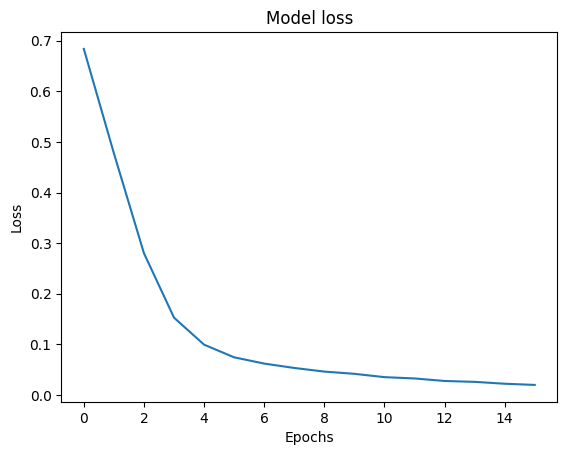

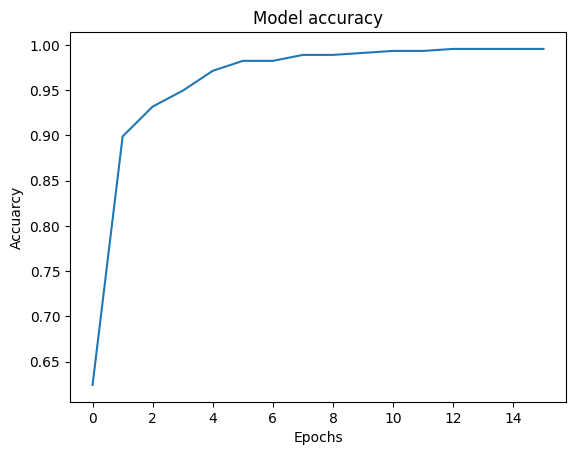

In [46]:
plt.plot(ann3_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann3_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [47]:
y_pred3 = get_pred_labels(ann3, X_test)

4/4 [==============================] - 0s 632us/step


<Figure size 640x480 with 0 Axes>

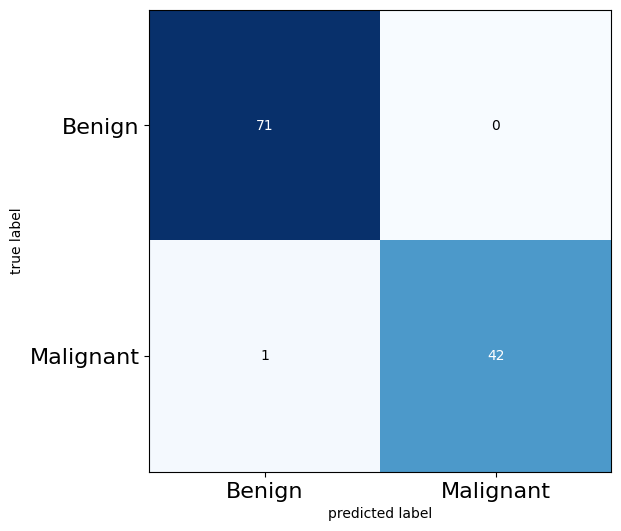

In [48]:
show_conf_matrix(y_pred3)

In [49]:
acc3 = accuracy_score(y_test.astype(int), y_pred3.astype(int))
acc3

0.9912280701754386

In [50]:
print(classification_report(y_test.astype(int), y_pred3.astype(int)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



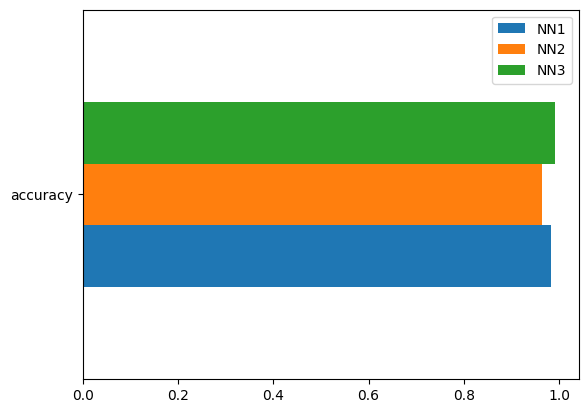

In [51]:
model_scores = {
    'NN1': acc1,
    'NN2': acc2,
    'NN3': acc3
}
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot(kind='barh',);

### Da li uraditi upsampling?
### Da li je okej posto ima manje podataka? Ideja je da se vidi da li ANN mogu da daju dobre rezultate sa malo podataka.
### Probati sa drugim loss funkcijama?
### Upsampling undersampling problemi ? koje algoritme koristiti za to?

## 2. ANNS Using "Adagrad" Optimiser

## ANN1 Adagrad

In [52]:
ann1_adagrad = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer
    tf.keras.layers.Dense(units=30, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [53]:
ann1_adagrad.compile(optimizer='adagrad',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [54]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
                                                  patience=3)


In [55]:
BATCH_SIZE = 32
EPOCHS = 100
ann1_hist_adagrad = ann1_adagrad.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 582us/step - loss: 0.5223 - accuracy: 0.7604
Epoch 2/100
15/15 [==============================] - 0s 507us/step - loss: 0.5036 - accuracy: 0.8308
Epoch 3/100
15/15 [==============================] - 0s 496us/step - loss: 0.4885 - accuracy: 0.8571
Epoch 4/100
15/15 [==============================] - 0s 537us/step - loss: 0.4751 - accuracy: 0.8813
Epoch 5/100
15/15 [==============================] - 0s 475us/step - loss: 0.4628 - accuracy: 0.8967
Epoch 6/100
15/15 [==============================] - 0s 584us/step - loss: 0.4517 - accuracy: 0.9099
Epoch 7/100
15/15 [==============================] - 0s 433us/step - loss: 0.4417 - accuracy: 0.9209
Epoch 8/100
15/15 [==============================] - 0s 576us/step - loss: 0.4321 - accuracy: 0.9319
Epoch 9/100
15/15 [==============================] - 0s 448us/step - loss: 0.4231 - accuracy: 0.9319
Epoch 10/100
15/15 [==============================] - 0s 582us/step - loss: 0.4147 - accura

In [56]:
### Evaluating

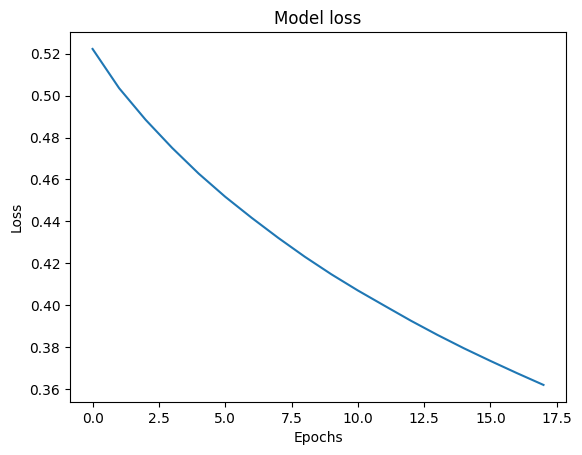

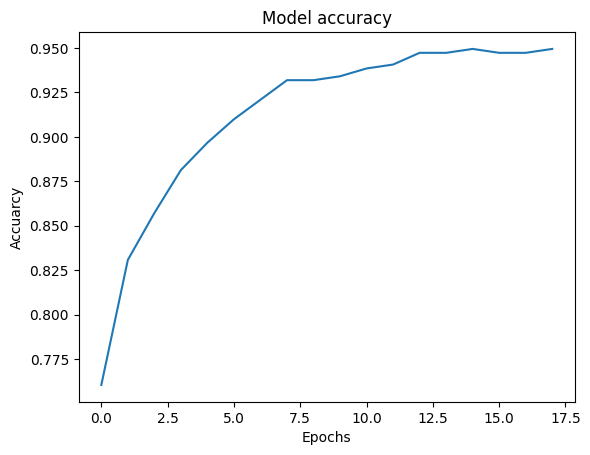

In [57]:
plt.plot(ann1_hist_adagrad.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann1_hist_adagrad.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [58]:
y_pred_adagrad = get_pred_labels(ann1_adagrad, X_test)

4/4 [==============================] - 0s 960us/step


In [59]:
y_pred_adagrad

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

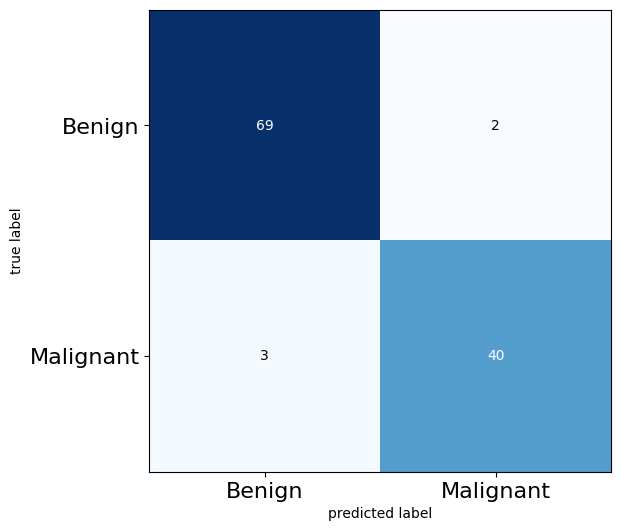

In [60]:
show_conf_matrix(y_pred_adagrad)


In [61]:
acc1_adagrad = accuracy_score(y_test.astype(int), y_pred_adagrad.astype(int))
acc1_adagrad

0.956140350877193

In [62]:
print(classification_report(y_test.astype(int), y_pred_adagrad.astype(int)))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## ANN2 Adagrad

In [63]:
ann2_adagrad = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=16, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dropout(rate=0.1), 
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [64]:
ann2_adagrad.compile(optimizer='adagrad',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [65]:
ann2_adagrad_hist = ann2_adagrad.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 578us/step - loss: 0.6733 - accuracy: 0.5209
Epoch 2/100
15/15 [==============================] - 0s 584us/step - loss: 0.6695 - accuracy: 0.5429
Epoch 3/100
15/15 [==============================] - 0s 516us/step - loss: 0.6353 - accuracy: 0.5846
Epoch 4/100
15/15 [==============================] - 0s 551us/step - loss: 0.6313 - accuracy: 0.5978
Epoch 5/100
15/15 [==============================] - 0s 524us/step - loss: 0.6276 - accuracy: 0.6220
Epoch 6/100
15/15 [==============================] - 0s 472us/step - loss: 0.5921 - accuracy: 0.6879
Epoch 7/100
15/15 [==============================] - 0s 504us/step - loss: 0.5819 - accuracy: 0.7077
Epoch 8/100
15/15 [==============================] - 0s 466us/step - loss: 0.5822 - accuracy: 0.6989
Epoch 9/100
15/15 [==============================] - 0s 504us/step - loss: 0.5668 - accuracy: 0.7297
Epoch 10/100
15/15 [==============================] - 0s 468us/step - loss: 0.5426 - accura

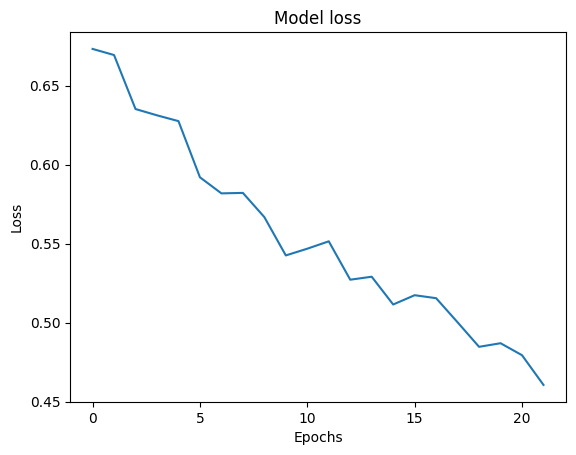

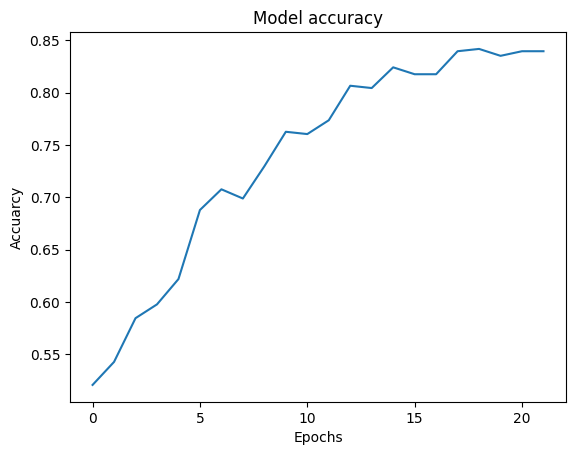

In [66]:
plt.plot(ann2_adagrad_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann2_adagrad_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [67]:
y_pred2_adagrad = get_pred_labels(ann2_adagrad, X_test)

4/4 [==============================] - 0s 779us/step


<Figure size 640x480 with 0 Axes>

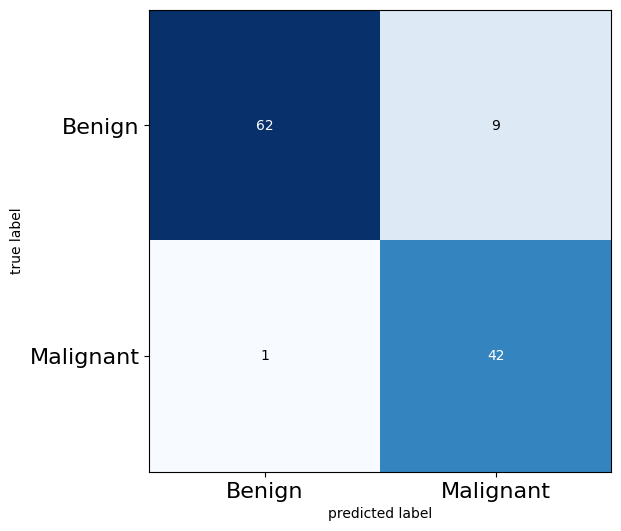

In [68]:
show_conf_matrix(y_pred2_adagrad)

In [69]:
acc2_adagrad = accuracy_score(y_test.astype(int), y_pred2_adagrad.astype(int))
acc2_adagrad

0.9122807017543859

In [70]:
print(classification_report(y_test.astype(int), y_pred2_adagrad.astype(int)))

              precision    recall  f1-score   support

           0       0.98      0.87      0.93        71
           1       0.82      0.98      0.89        43

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



## ANN3 Adagrad

In [71]:
ann3_adagrad = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [72]:
ann3_adagrad.compile(optimizer='adagrad',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [73]:
ann3_adagrad_hist = ann3_adagrad.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 567us/step - loss: 0.6281 - accuracy: 0.7934
Epoch 2/100
15/15 [==============================] - 0s 542us/step - loss: 0.6170 - accuracy: 0.8066
Epoch 3/100
15/15 [==============================] - 0s 626us/step - loss: 0.6065 - accuracy: 0.8220
Epoch 4/100
15/15 [==============================] - 0s 551us/step - loss: 0.5957 - accuracy: 0.8264
Epoch 5/100
15/15 [==============================] - 0s 512us/step - loss: 0.5851 - accuracy: 0.8264
Epoch 6/100
15/15 [==============================] - 0s 562us/step - loss: 0.5743 - accuracy: 0.8308
Epoch 7/100
15/15 [==============================] - 0s 495us/step - loss: 0.5637 - accuracy: 0.8330
Epoch 8/100
15/15 [==============================] - 0s 614us/step - loss: 0.5537 - accuracy: 0.8374
Epoch 9/100
15/15 [==============================] - 0s 481us/step - loss: 0.5433 - accuracy: 0.8462
Epoch 10/100
15/15 [==============================] - 0s 539us/step - loss: 0.5334 - accura

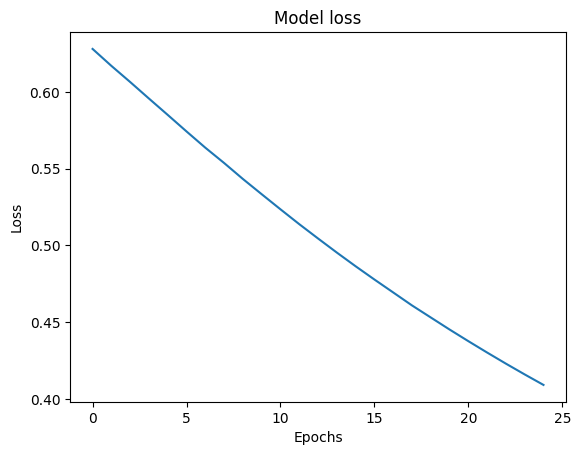

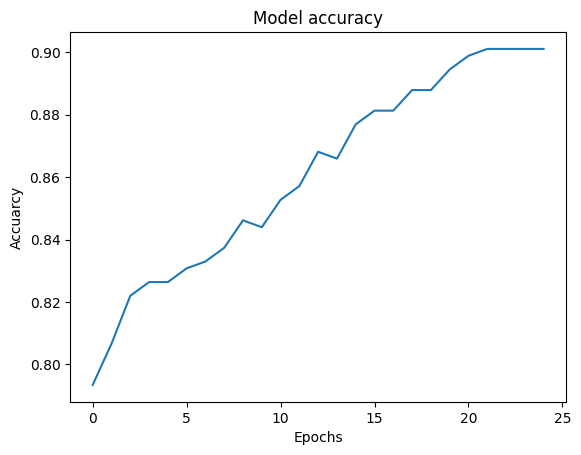

In [74]:
plt.plot(ann3_adagrad_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann3_adagrad_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [75]:
y_pred3_adagrad = get_pred_labels(ann3_adagrad, X_test)

4/4 [==============================] - 0s 668us/step


<Figure size 640x480 with 0 Axes>

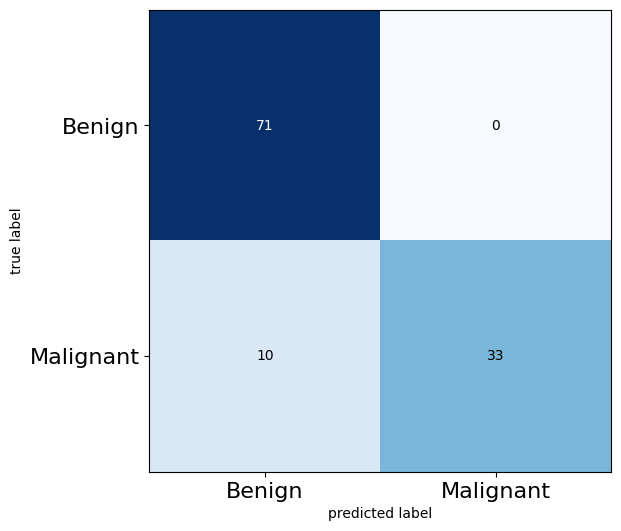

In [76]:
show_conf_matrix(y_pred3_adagrad)

In [77]:
acc3_adagrad = accuracy_score(y_test.astype(int), y_pred3_adagrad.astype(int))
acc3_adagrad

0.9122807017543859

In [78]:
print(classification_report(y_test.astype(int), y_pred3_adagrad.astype(int)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        71
           1       1.00      0.77      0.87        43

    accuracy                           0.91       114
   macro avg       0.94      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114



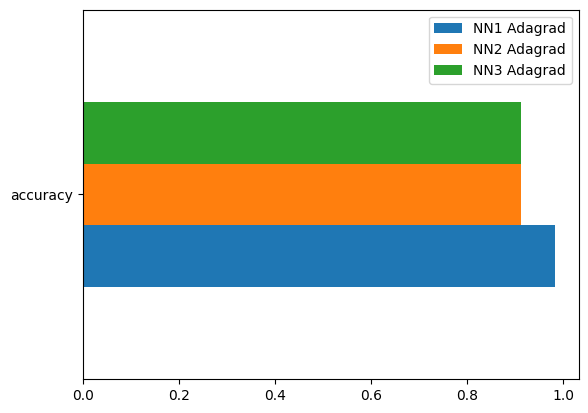

In [79]:
model_scores = {
    'NN1 Adagrad': acc1,
    'NN2 Adagrad': acc2_adagrad,
    'NN3 Adagrad': acc3_adagrad
}
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot(kind='barh',);

## 3. ANNS Using "rmsprop" Optimiser

## ANN1 rmsprop

In [80]:
ann1_rmsprop = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer
    tf.keras.layers.Dense(units=30, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])


In [81]:
ann1_rmsprop.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [82]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
                                                  patience=3)

In [83]:
BATCH_SIZE = 32
EPOCHS = 100
ann1_hist_rmsprop = ann1_rmsprop.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 573us/step - loss: 0.4345 - accuracy: 0.8440
Epoch 2/100
15/15 [==============================] - 0s 518us/step - loss: 0.2721 - accuracy: 0.9429
Epoch 3/100
15/15 [==============================] - 0s 517us/step - loss: 0.1968 - accuracy: 0.9582
Epoch 4/100
15/15 [==============================] - 0s 443us/step - loss: 0.1519 - accuracy: 0.9648
Epoch 5/100
15/15 [==============================] - 0s 462us/step - loss: 0.1231 - accuracy: 0.9692
Epoch 6/100
15/15 [==============================] - 0s 482us/step - loss: 0.1037 - accuracy: 0.9736
Epoch 7/100
15/15 [==============================] - 0s 459us/step - loss: 0.0903 - accuracy: 0.9736
Epoch 8/100
15/15 [==============================] - 0s 578us/step - loss: 0.0802 - accuracy: 0.9780
Epoch 9/100
15/15 [==============================] - 0s 466us/step - loss: 0.0732 - accuracy: 0.9780
Epoch 10/100
15/15 [==============================] - 0s 513us/step - loss: 0.0673 - accura

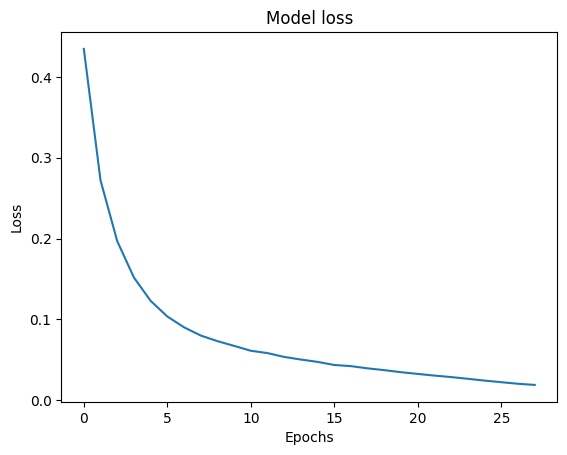

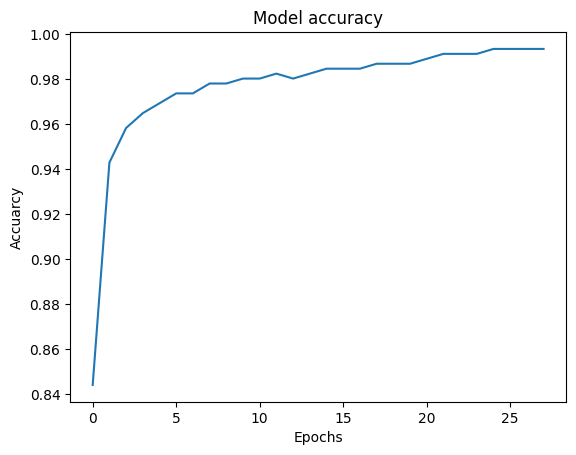

In [84]:
#EVALUATING

plt.plot(ann1_hist_rmsprop.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann1_hist_rmsprop.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [85]:
y_pred_rmsprop = get_pred_labels(ann1_rmsprop, X_test)

y_pred_rmsprop

4/4 [==============================] - 0s 820us/step


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

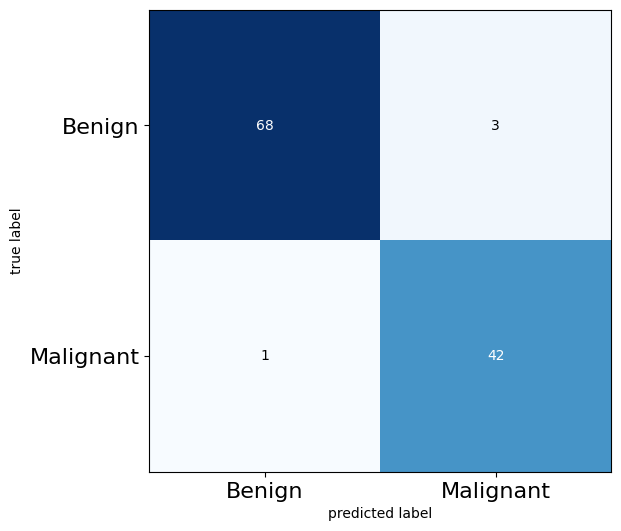

In [86]:
show_conf_matrix(y_pred_rmsprop)

In [87]:
acc1_rmsprop = accuracy_score(y_test.astype(int), y_pred_rmsprop.astype(int))
acc1_rmsprop

0.9649122807017544

In [88]:
print(classification_report(y_test.astype(int), y_pred_rmsprop.astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



## ANN2 rmsprop

In [89]:
ann2_rmsprop = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=16, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dropout(rate=0.1), 
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [90]:
ann2_rmsprop.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [91]:
ann2_hist_rmsprop = ann2_rmsprop.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 557us/step - loss: 0.5586 - accuracy: 0.7956
Epoch 2/100
15/15 [==============================] - 0s 530us/step - loss: 0.3989 - accuracy: 0.9033
Epoch 3/100
15/15 [==============================] - 0s 581us/step - loss: 0.3044 - accuracy: 0.9297
Epoch 4/100
15/15 [==============================] - 0s 552us/step - loss: 0.2407 - accuracy: 0.9429
Epoch 5/100
15/15 [==============================] - 0s 476us/step - loss: 0.1942 - accuracy: 0.9407
Epoch 6/100
15/15 [==============================] - 0s 574us/step - loss: 0.1559 - accuracy: 0.9560
Epoch 7/100
15/15 [==============================] - 0s 487us/step - loss: 0.1430 - accuracy: 0.9670
Epoch 8/100
15/15 [==============================] - 0s 487us/step - loss: 0.1258 - accuracy: 0.9626
Epoch 9/100
15/15 [==============================] - 0s 520us/step - loss: 0.1101 - accuracy: 0.9736
Epoch 10/100
15/15 [==============================] - 0s 482us/step - loss: 0.0934 - accura

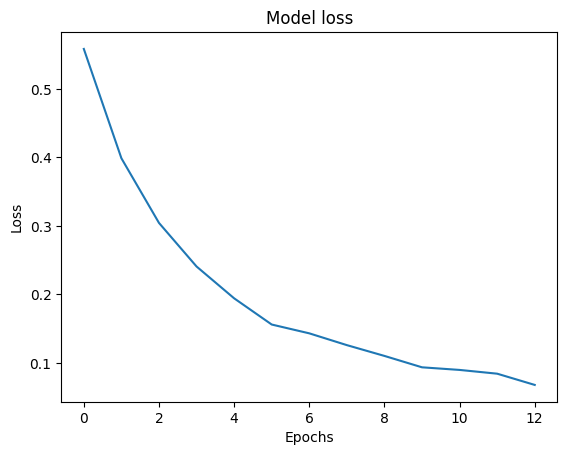

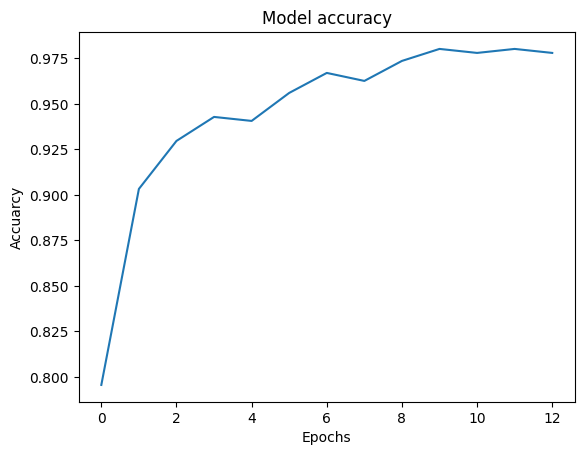

In [92]:
plt.plot(ann2_hist_rmsprop.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann2_hist_rmsprop.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [93]:
y_pred2_rmsprop = get_pred_labels(ann2_rmsprop, X_test)

4/4 [==============================] - 0s 1ms/step


<Figure size 640x480 with 0 Axes>

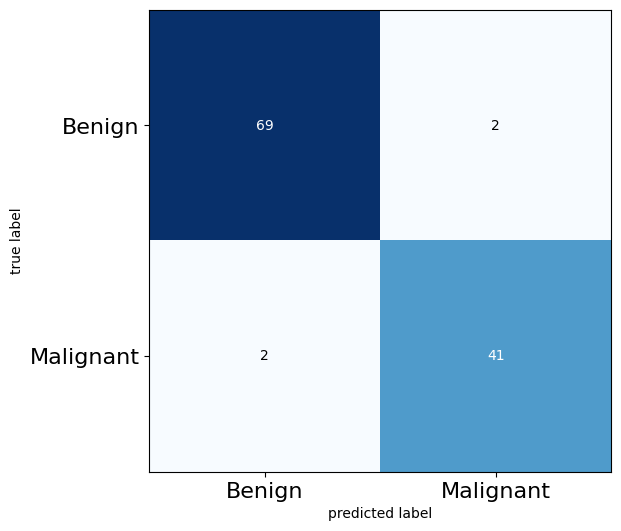

In [94]:
show_conf_matrix(y_pred2_rmsprop)

In [95]:
acc2_rmsprop = accuracy_score(y_test.astype(int), y_pred2_rmsprop.astype(int))
acc2_rmsprop

0.9649122807017544

In [96]:
print(classification_report(y_test.astype(int), y_pred2_rmsprop.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



## ANN3 rmsprop

In [97]:
ann3_rmsprop = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [98]:
ann3_rmsprop.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])
			
			
ann3_hist_rmsprop = ann3_rmsprop.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 593us/step - loss: 0.4516 - accuracy: 0.9011
Epoch 2/100
15/15 [==============================] - 0s 550us/step - loss: 0.2112 - accuracy: 0.9407
Epoch 3/100
15/15 [==============================] - 0s 588us/step - loss: 0.1350 - accuracy: 0.9626
Epoch 4/100
15/15 [==============================] - 0s 582us/step - loss: 0.1046 - accuracy: 0.9648
Epoch 5/100
15/15 [==============================] - 0s 610us/step - loss: 0.0833 - accuracy: 0.9692
Epoch 6/100
15/15 [==============================] - 0s 528us/step - loss: 0.0703 - accuracy: 0.9714
Epoch 7/100
15/15 [==============================] - 0s 655us/step - loss: 0.0611 - accuracy: 0.9780
Epoch 8/100
15/15 [==============================] - 0s 499us/step - loss: 0.0514 - accuracy: 0.9824
Epoch 9/100
15/15 [==============================] - 0s 517us/step - loss: 0.0475 - accuracy: 0.9802
Epoch 10/100
15/15 [==============================] - 0s 498us/step - loss: 0.0402 - accura

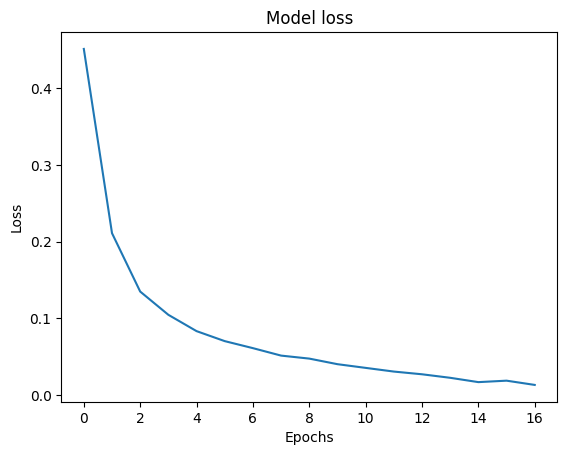

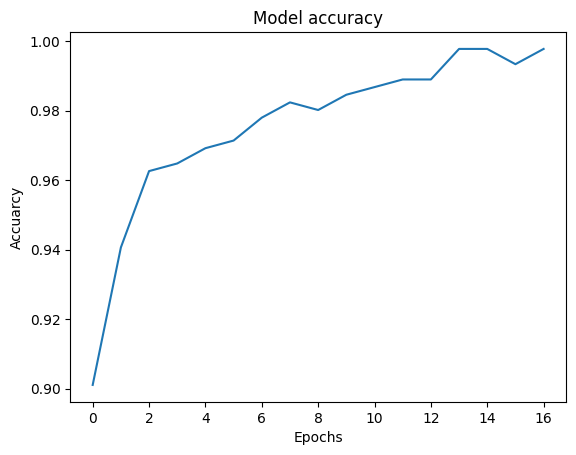

In [99]:
plt.plot(ann3_hist_rmsprop.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann3_hist_rmsprop.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [100]:
y_pred3_rmsprop = get_pred_labels(ann3_rmsprop, X_test)

4/4 [==============================] - 0s 613us/step


<Figure size 640x480 with 0 Axes>

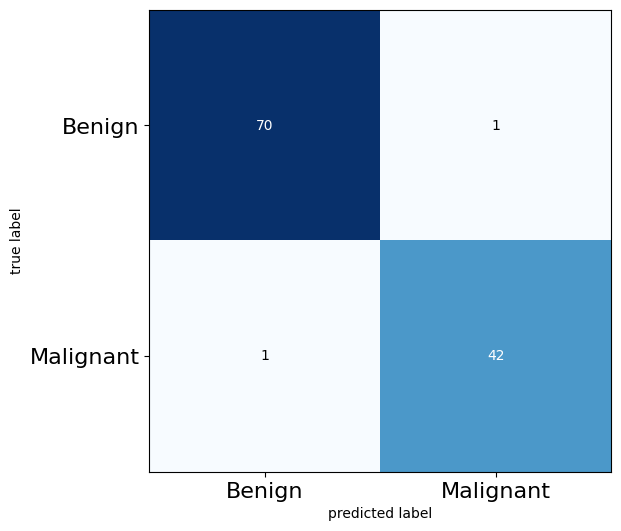

In [101]:
show_conf_matrix(y_pred3_rmsprop)

In [102]:
acc3_rmsprop = accuracy_score(y_test.astype(int), y_pred3_rmsprop.astype(int))
acc3_rmsprop

0.9824561403508771

In [103]:
print(classification_report(y_test.astype(int), y_pred3_rmsprop.astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



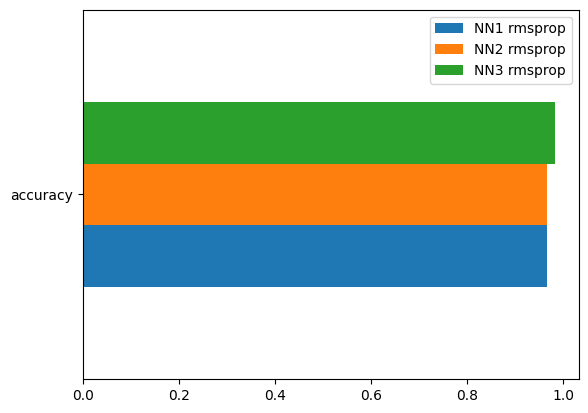

In [104]:
model_scores_rmsprop = {
    'NN1 rmsprop': acc1_rmsprop,
    'NN2 rmsprop': acc2_rmsprop,
    'NN3 rmsprop': acc3_rmsprop
}
model_compare_rmsprop = pd.DataFrame(model_scores_rmsprop, index=["accuracy"])
model_compare_rmsprop.plot(kind='barh',);

## Sopstvena loss funkcija 1

https://www.analyticsvidhya.com/blog/2022/09/dummies-guide-to-writing-a-custom-loss-function-in-tensorflow/

In [105]:
class Custom_CE_Loss(tf.keras.losses.Loss):
    def __init__(self):
        super().__init__()
    def call(self, y_true, y_pred):        
        log_y_pred = tf.math.log(y_pred)
        elements = -tf.math.multiply_no_nan(x=log_y_pred, y=y_true)
        return tf.reduce_mean(tf.reduce_sum(elements,axis=1))
    
def SelfLossFunction2(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    custom_loss=kb.square(y_true-y_pred)
    return custom_loss

## ANN3 using rmsprop and custom loss

In [106]:
ann3_rmsprop_customloss = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [107]:
ann3_rmsprop_customloss.compile(optimizer='rmsprop',
            loss=SelfLossFunction2,
            metrics=['accuracy'])

In [108]:
ann3_hist_rmsprop_customloss = ann3_rmsprop_customloss.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 0s 536us/step - loss: 0.1493 - accuracy: 0.8637
Epoch 2/100
15/15 [==============================] - 0s 576us/step - loss: 0.0567 - accuracy: 0.9538
Epoch 3/100
15/15 [==============================] - 0s 530us/step - loss: 0.0332 - accuracy: 0.9758
Epoch 4/100
15/15 [==============================] - 0s 550us/step - loss: 0.0239 - accuracy: 0.9824
Epoch 5/100
15/15 [==============================] - 0s 510us/step - loss: 0.0192 - accuracy: 0.9802
Epoch 6/100
15/15 [==============================] - 0s 525us/step - loss: 0.0161 - accuracy: 0.9868
Epoch 7/100
15/15 [==============================] - 0s 518us/step - loss: 0.0140 - accuracy: 0.9868
Epoch 8/100
15/15 [==============================] - 0s 450us/step - loss: 0.0121 - accuracy: 0.9912
Epoch 9/100
15/15 [==============================] - 0s 519us/step - loss: 0.0112 - accuracy: 0.9912
Epoch 10/100
15/15 [==============================] - 0s 478us/step - loss: 0.0098 - accura

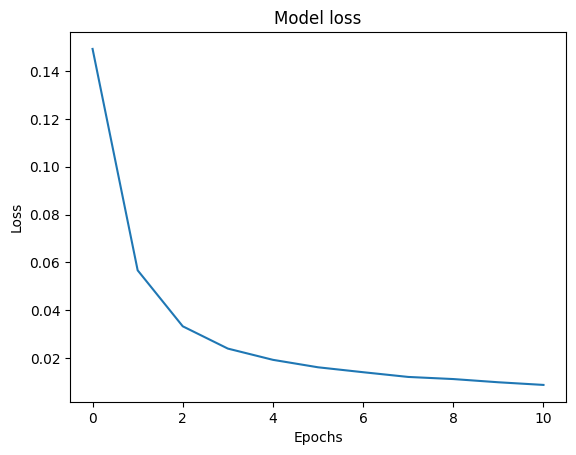

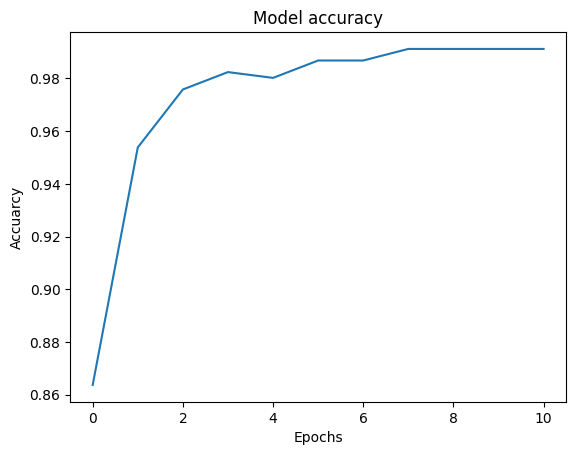

In [109]:
plt.plot(ann3_hist_rmsprop_customloss.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann3_hist_rmsprop_customloss.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [110]:
y_pred3_rmsprop_customloss = get_pred_labels(ann3_rmsprop_customloss, X_test)

4/4 [==============================] - 0s 600us/step


<Figure size 640x480 with 0 Axes>

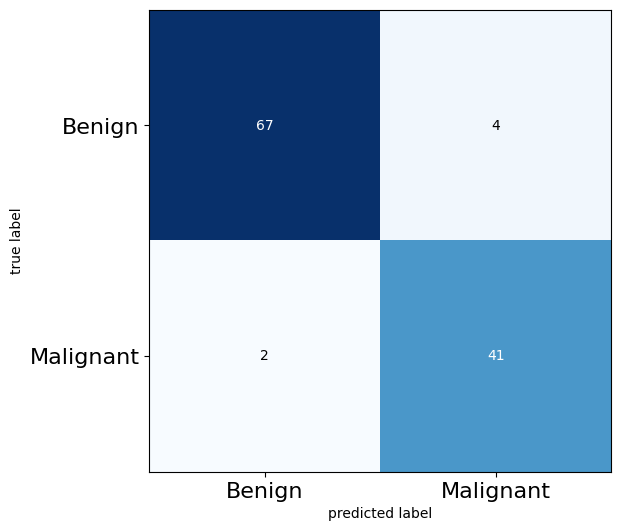

In [111]:
show_conf_matrix(y_pred3_rmsprop_customloss)

In [112]:
acc3_rmsprop_customloss = accuracy_score(y_test.astype(int), y_pred3_rmsprop_customloss.astype(int))
acc3_rmsprop_customloss

0.9473684210526315

In [113]:
print(classification_report(y_test.astype(int), y_pred3_rmsprop_customloss.astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        71
           1       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



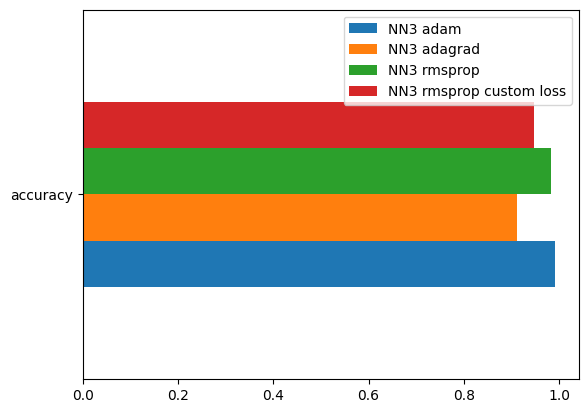

In [114]:
model_scores_anns3 = {
    'NN3 adam': acc3,
    'NN3 adagrad': acc3_adagrad,
    'NN3 rmsprop': acc3_rmsprop,
    'NN3 rmsprop custom loss': acc3_rmsprop_customloss
}
model_compare_rmsprop_anns3 = pd.DataFrame(model_scores_anns3, index=["accuracy"])
model_compare_rmsprop_anns3.plot(kind='barh',);

## Overfitting ANN1

In [115]:
ann_overfitted = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [116]:
ann_overfitted.compile(optimizer='adam',
            loss=tf.keras.losses.MeanAbsoluteError(),
            metrics=['accuracy'])

In [117]:
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
#                                                  patience=3)
    

X_train_overfitted = np.asarray(X_train).astype('float32')
y_train_overfitted = np.asarray(y_train).astype('float32')

In [118]:
BATCH_SIZE = 32
EPOCHS = 100
ann_hist_overfitted = ann_overfitted.fit(X_train_overfitted, y_train_overfitted, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/100
15/15 [==============================] - 0s 570us/step - loss: 0.3996 - accuracy: 0.8352
Epoch 2/100
15/15 [==============================] - 0s 520us/step - loss: 0.2045 - accuracy: 0.9341
Epoch 3/100
15/15 [==============================] - 0s 525us/step - loss: 0.0896 - accuracy: 0.9516
Epoch 4/100
15/15 [==============================] - 0s 521us/step - loss: 0.0552 - accuracy: 0.9670
Epoch 5/100
15/15 [==============================] - 0s 553us/step - loss: 0.0420 - accuracy: 0.9714
Epoch 6/100
15/15 [==============================] - 0s 509us/step - loss: 0.0337 - accuracy: 0.9736
Epoch 7/100
15/15 [==============================] - 0s 490us/step - loss: 0.0281 - accuracy: 0.9758
Epoch 8/100
15/15 [==============================] - 0s 511us/step - loss: 0.0248 - accuracy: 0.9846
Epoch 9/100
15/15 [==============================] - 0s 551us/step - loss: 0.0208 - accuracy: 0.9846
Epoch 10/100
15/15 [==============================] - 0s 508us/step - loss: 0.0181 - accura

15/15 [==============================] - 0s 738us/step - loss: 0.0022 - accuracy: 0.9978
Epoch 82/100
15/15 [==============================] - 0s 528us/step - loss: 0.0022 - accuracy: 0.9978
Epoch 83/100
15/15 [==============================] - 0s 602us/step - loss: 0.0022 - accuracy: 0.9978
Epoch 84/100
15/15 [==============================] - 0s 499us/step - loss: 0.0022 - accuracy: 0.9978
Epoch 85/100
15/15 [==============================] - 0s 602us/step - loss: 0.0022 - accuracy: 0.9978
Epoch 86/100
15/15 [==============================] - 0s 509us/step - loss: 0.0022 - accuracy: 0.9978
Epoch 87/100
15/15 [==============================] - 0s 520us/step - loss: 0.0022 - accuracy: 0.9978
Epoch 88/100
15/15 [==============================] - 0s 543us/step - loss: 0.0022 - accuracy: 0.9978
Epoch 89/100
15/15 [==============================] - 0s 505us/step - loss: 0.0022 - accuracy: 0.9978
Epoch 90/100
15/15 [==============================] - 0s 543us/step - loss: 0.0022 - accuracy: 

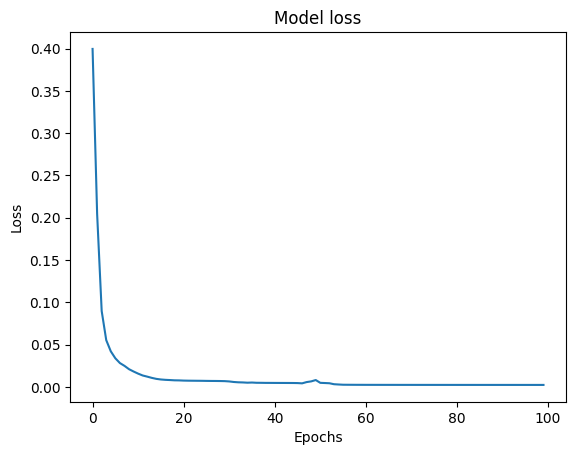

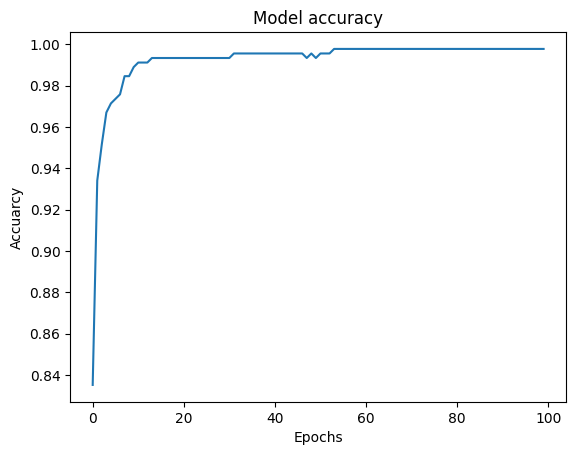

In [119]:
plt.plot(ann_hist_overfitted.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann_hist_overfitted.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [120]:
y_pred_overfitted = get_pred_labels(ann_overfitted, X_test)
y_pred_overfitted

4/4 [==============================] - 0s 613us/step


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

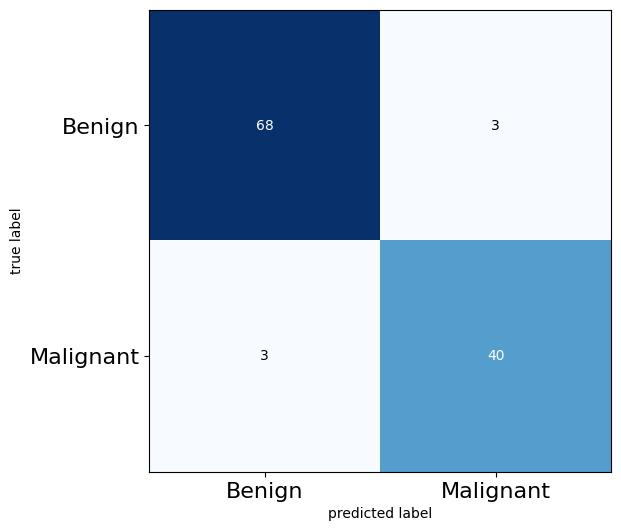

In [121]:
show_conf_matrix(y_pred_overfitted)

In [122]:
acc_overfitted = accuracy_score(y_test.astype(int), y_pred_overfitted.astype(int))
acc_overfitted

0.9473684210526315

In [123]:
print(classification_report(y_test.astype(int), y_pred_overfitted.astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## ANN Overfitted using rmsprop optimiser loss + added one more layer + added 50 epochs

In [124]:
ann_overfitted_MAPE = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'), # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=10, activation='relu'), # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])

In [125]:
ann_overfitted_MAPE.compile(optimizer='rmsprop',
            loss=tf.keras.losses.MeanAbsoluteError(),
            metrics=['accuracy'])

In [126]:
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
#                                                  patience=3)
    

X_train_overfitted_MAPE = np.asarray(X_train).astype('float32')
y_train_overfitted_MAPE = np.asarray(y_train).astype('float32')

In [127]:
BATCH_SIZE = 32
EPOCHS = 150
ann_hist_overfitted_MAPE = ann_overfitted_MAPE.fit(X_train_overfitted_MAPE, y_train_overfitted_MAPE, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/150
15/15 [==============================] - 0s 557us/step - loss: 0.4165 - accuracy: 0.7868
Epoch 2/150
15/15 [==============================] - 0s 561us/step - loss: 0.2728 - accuracy: 0.9165
Epoch 3/150
15/15 [==============================] - 0s 587us/step - loss: 0.1508 - accuracy: 0.9451
Epoch 4/150
15/15 [==============================] - 0s 568us/step - loss: 0.0900 - accuracy: 0.9560
Epoch 5/150
15/15 [==============================] - 0s 546us/step - loss: 0.0584 - accuracy: 0.9648
Epoch 6/150
15/15 [==============================] - 0s 548us/step - loss: 0.0440 - accuracy: 0.9736
Epoch 7/150
15/15 [==============================] - 0s 488us/step - loss: 0.0353 - accuracy: 0.9714
Epoch 8/150
15/15 [==============================] - 0s 515us/step - loss: 0.0291 - accuracy: 0.9780
Epoch 9/150
15/15 [==============================] - 0s 502us/step - loss: 0.0257 - accuracy: 0.9802
Epoch 10/150
15/15 [==============================] - 0s 562us/step - loss: 0.0230 - accura

15/15 [==============================] - 0s 476us/step - loss: 0.0066 - accuracy: 0.9934
Epoch 82/150
15/15 [==============================] - 0s 480us/step - loss: 0.0066 - accuracy: 0.9934
Epoch 83/150
15/15 [==============================] - 0s 489us/step - loss: 0.0066 - accuracy: 0.9934
Epoch 84/150
15/15 [==============================] - 0s 458us/step - loss: 0.0066 - accuracy: 0.9934
Epoch 85/150
15/15 [==============================] - 0s 489us/step - loss: 0.0066 - accuracy: 0.9934
Epoch 86/150
15/15 [==============================] - 0s 459us/step - loss: 0.0066 - accuracy: 0.9934
Epoch 87/150
15/15 [==============================] - 0s 464us/step - loss: 0.0079 - accuracy: 0.9912
Epoch 88/150
15/15 [==============================] - 0s 455us/step - loss: 0.0047 - accuracy: 0.9956
Epoch 89/150
15/15 [==============================] - 0s 467us/step - loss: 0.0046 - accuracy: 0.9956
Epoch 90/150
15/15 [==============================] - 0s 513us/step - loss: 0.0044 - accuracy: 

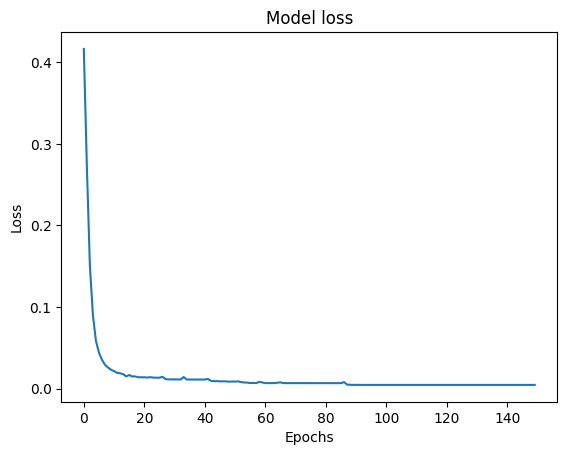

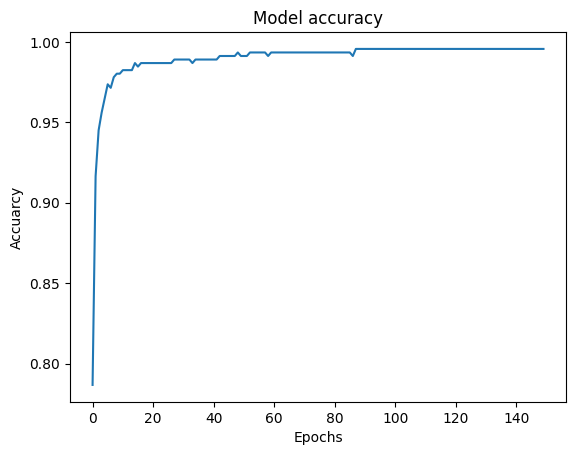

In [128]:
plt.plot(ann_hist_overfitted_MAPE.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann_hist_overfitted_MAPE.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [129]:
y_pred_overfitted_MAPE = get_pred_labels(ann_overfitted_MAPE, X_test)
y_pred_overfitted_MAPE

4/4 [==============================] - 0s 619us/step


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

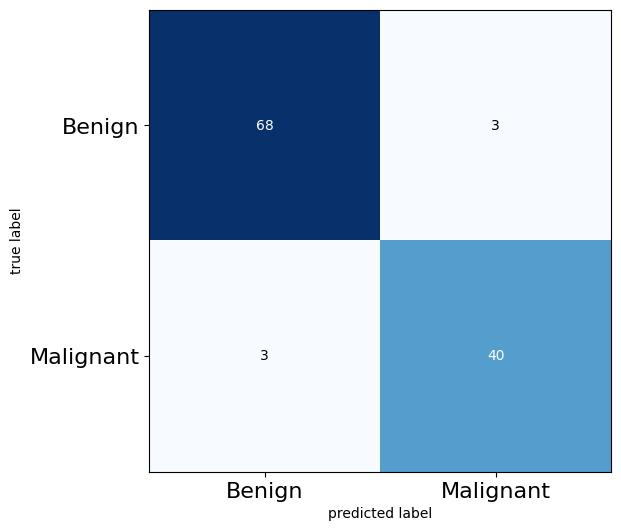

In [130]:
show_conf_matrix(y_pred_overfitted_MAPE)

In [131]:
acc_overfitted_MAPE = accuracy_score(y_test.astype(int), y_pred_overfitted_MAPE.astype(int))
acc_overfitted_MAPE

0.9473684210526315

In [132]:
print(classification_report(y_test.astype(int), y_pred_overfitted_MAPE.astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Upsampling i undersampling koriscenjem algoritama [2]

[2] https://towardsdatascience.com/smote-fdce2f605729

## Gridsearch za optimalan broj layer-a i neurona u layer-u

### Oversampling using SMOTE

<Axes: title={'center': 'Class distribution after applying SMOTE'}, xlabel='buy'>

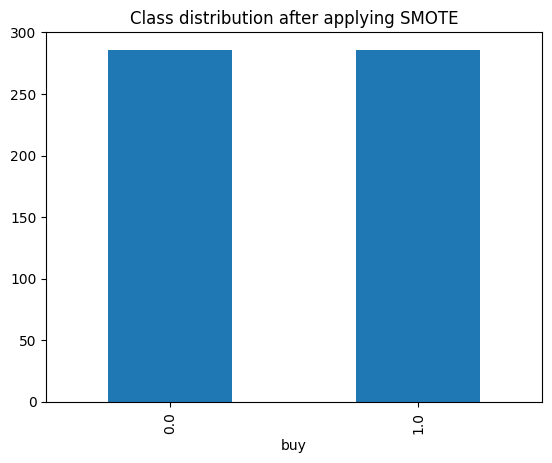

In [156]:
X_oversampled, y_oversampled = SMOTE().fit_resample(X_train, y_train)
pd.Series(y_oversampled).value_counts().plot(kind='bar', title='Class distribution after applying SMOTE', xlabel='buy')

In [157]:
ann_oversampled = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'),  # Input layer
    tf.keras.layers.Dense(units=30, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Output layer
])
ann_oversampled.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                  patience=3)

In [158]:
BATCH_SIZE = 32
EPOCHS = 100
ann_oversampled_hist = ann_oversampled.fit(X_oversampled, y_oversampled, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100
18/18 [==============================] - 0s 561us/step - loss: 0.6575 - accuracy: 0.5944
Epoch 2/100
18/18 [==============================] - 0s 535us/step - loss: 0.4263 - accuracy: 0.8829
Epoch 3/100
18/18 [==============================] - 0s 488us/step - loss: 0.3009 - accuracy: 0.9283
Epoch 4/100
18/18 [==============================] - 0s 478us/step - loss: 0.2228 - accuracy: 0.9441
Epoch 5/100
18/18 [==============================] - 0s 519us/step - loss: 0.1699 - accuracy: 0.9650
Epoch 6/100
18/18 [==============================] - 0s 476us/step - loss: 0.1352 - accuracy: 0.9720
Epoch 7/100
18/18 [==============================] - 0s 431us/step - loss: 0.1123 - accuracy: 0.9720
Epoch 8/100
18/18 [==============================] - 0s 443us/step - loss: 0.0952 - accuracy: 0.9808
Epoch 9/100
18/18 [==============================] - 0s 419us/step - loss: 0.0840 - accuracy: 0.9808
Epoch 10/100
18/18 [==============================] - 0s 454us/step - loss: 0.0751 - accura

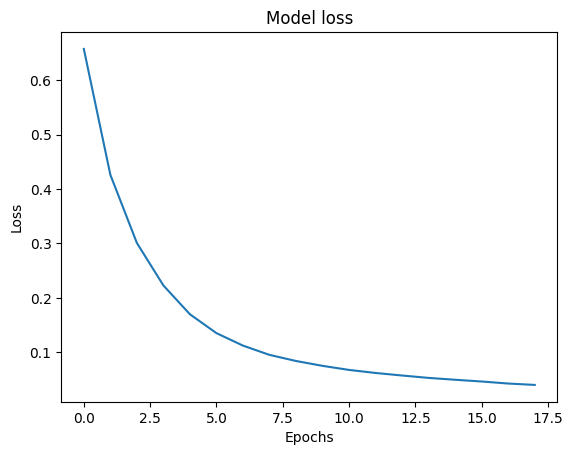

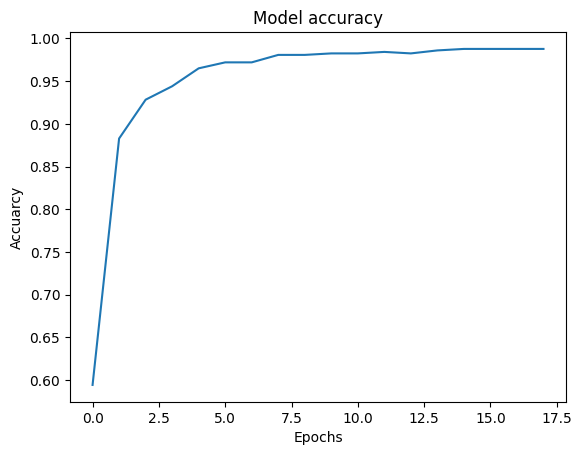

In [159]:
plt.plot(ann_oversampled_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(ann_oversampled_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

In [160]:
y_pred_oversampled = get_pred_labels(ann_oversampled, X_test)
y_pred_oversampled

4/4 [==============================] - 0s 4ms/step


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

<Figure size 640x480 with 0 Axes>

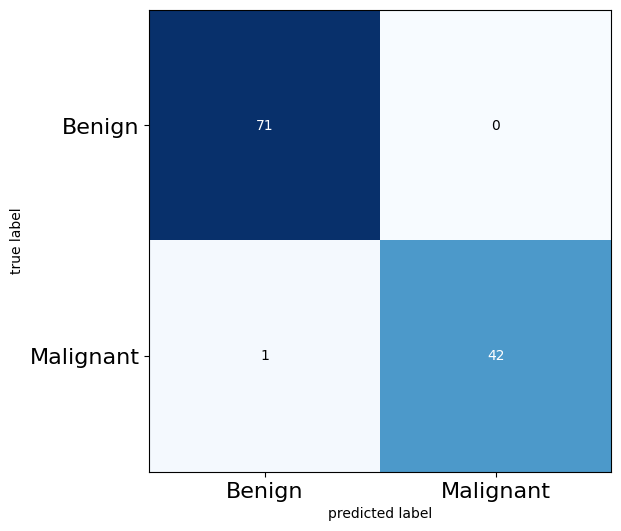

In [161]:
show_conf_matrix(y_pred_oversampled)

In [162]:
accuracy_score_oversampled = accuracy_score(y_test.astype(int), y_pred_oversampled.astype(int))
accuracy_score_oversampled

0.9912280701754386

In [163]:
recall_oversampled = recall_score(y_test.astype(int), y_pred_oversampled.astype(int))
recall_oversampled

0.9767441860465116

In [164]:
print(classification_report(y_test.astype(int), y_pred_oversampled.astype(int)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



### ANN2 Oversampled RMSPROP optimization

In [165]:
ann2_rmsprop_oversampled = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'),  # Input layer and 1st Hidden layer
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=16, activation='relu'),  # 2nd Hidden layer
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Output layer
])
ann2_rmsprop_oversampled.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
ann2_rmsprop_oversampled_hist = ann2_rmsprop_oversampled.fit(X_oversampled, y_oversampled, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])


Epoch 1/100
18/18 [==============================] - 0s 567us/step - loss: 0.6080 - accuracy: 0.6416
Epoch 2/100
18/18 [==============================] - 0s 583us/step - loss: 0.4265 - accuracy: 0.8759
Epoch 3/100
18/18 [==============================] - 0s 558us/step - loss: 0.3129 - accuracy: 0.9353
Epoch 4/100
18/18 [==============================] - 0s 518us/step - loss: 0.2245 - accuracy: 0.9528
Epoch 5/100
18/18 [==============================] - 0s 553us/step - loss: 0.1777 - accuracy: 0.9633
Epoch 6/100
18/18 [==============================] - 0s 472us/step - loss: 0.1381 - accuracy: 0.9615
Epoch 7/100
18/18 [==============================] - 0s 467us/step - loss: 0.1214 - accuracy: 0.9720
Epoch 8/100
18/18 [==============================] - 0s 442us/step - loss: 0.1095 - accuracy: 0.9808
Epoch 9/100
18/18 [==============================] - 0s 472us/step - loss: 0.0877 - accuracy: 0.9843
Epoch 10/100
18/18 [==============================] - 0s 491us/step - loss: 0.0846 - accura

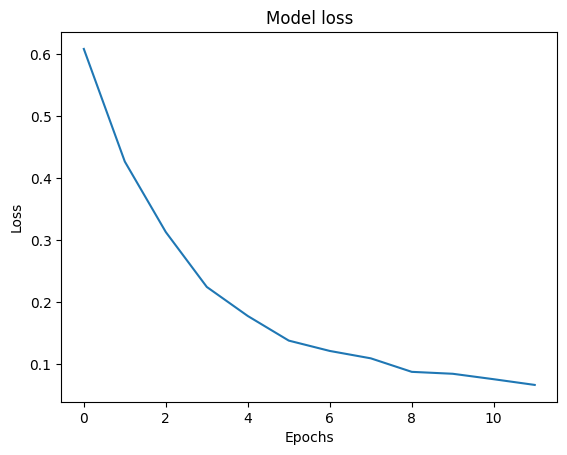

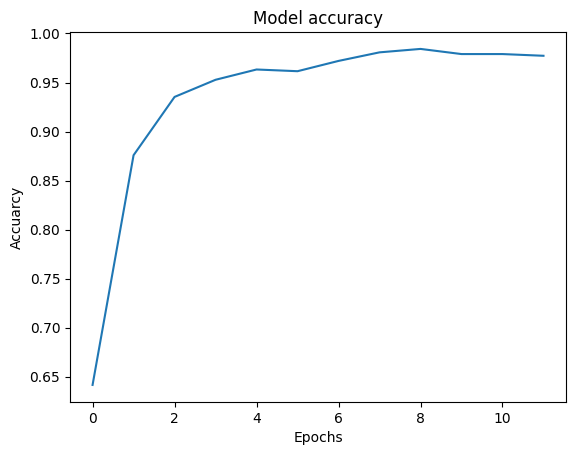

In [166]:
plt.plot(ann2_rmsprop_oversampled_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann2_rmsprop_oversampled_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

4/4 [==============================] - 0s 1ms/step


<Figure size 640x480 with 0 Axes>

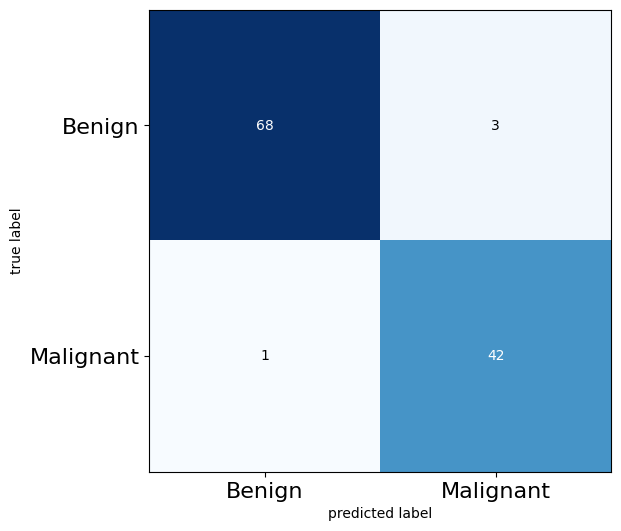

In [167]:
y_pred2_rmsprop_oversampled = get_pred_labels(ann2_rmsprop_oversampled, X_test)
show_conf_matrix(y_pred2_rmsprop_oversampled)

In [168]:
acc2_rmsprop_oversampled = accuracy_score(y_test.astype(int), y_pred2_rmsprop_oversampled.astype(int))
acc2_rmsprop_oversampled

0.9649122807017544

In [169]:
recall2_rmsprop_oversampled = recall_score(y_test.astype(int), y_pred2_rmsprop_oversampled.astype(int))
recall2_rmsprop_oversampled

0.9767441860465116

In [170]:
print(classification_report(y_test.astype(int), y_pred2_rmsprop_oversampled.astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



### ANN3 Oversampled adam optimizer

In [171]:
ann3_adam_oversampled = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, activation='relu'),  # Input layer and 1st Hidden layer
    tf.keras.layers.Dense(units=60, activation='relu'),  # 2nd Hidden layer
    tf.keras.layers.Dense(units=40, activation='relu'),  # 2nd Hidden layer
    tf.keras.layers.Dense(units=20, activation='relu'),  # 2nd Hidden layer
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Output layer
])
ann3_adam_oversampled.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
ann3_adam_oversampled_hist = ann3_adam_oversampled.fit(X_oversampled, y_oversampled, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])


Epoch 1/100
18/18 [==============================] - 1s 633us/step - loss: 0.4867 - accuracy: 0.8024
Epoch 2/100
18/18 [==============================] - 0s 660us/step - loss: 0.2422 - accuracy: 0.9248
Epoch 3/100
18/18 [==============================] - 0s 590us/step - loss: 0.1481 - accuracy: 0.9493
Epoch 4/100
18/18 [==============================] - 0s 589us/step - loss: 0.1053 - accuracy: 0.9598
Epoch 5/100
18/18 [==============================] - 0s 552us/step - loss: 0.0803 - accuracy: 0.9720
Epoch 6/100
18/18 [==============================] - 0s 544us/step - loss: 0.0668 - accuracy: 0.9755
Epoch 7/100
18/18 [==============================] - 0s 534us/step - loss: 0.0549 - accuracy: 0.9808
Epoch 8/100
18/18 [==============================] - 0s 521us/step - loss: 0.0453 - accuracy: 0.9825
Epoch 9/100
18/18 [==============================] - 0s 539us/step - loss: 0.0377 - accuracy: 0.9860
Epoch 10/100
18/18 [==============================] - 0s 515us/step - loss: 0.0305 - accura

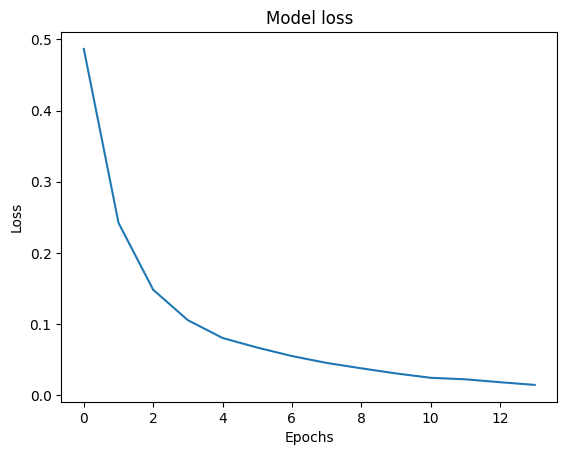

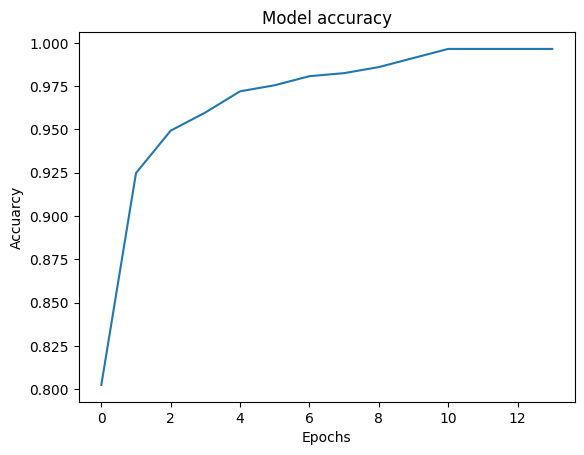

In [172]:
plt.plot(ann3_adam_oversampled_hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(ann3_adam_oversampled_hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.show()

4/4 [==============================] - 0s 628us/step


<Figure size 640x480 with 0 Axes>

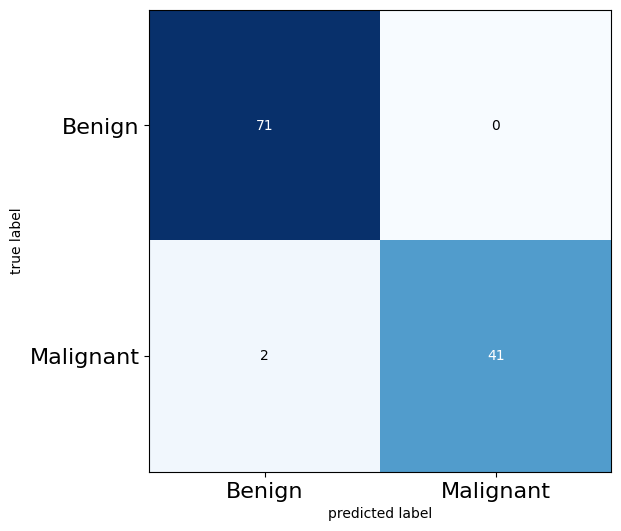

In [173]:
y_pred3_adam_oversampled = get_pred_labels(ann3_adam_oversampled, X_test)
show_conf_matrix(y_pred3_adam_oversampled)

In [174]:
acc3_adam_oversampled = accuracy_score(y_test.astype(int), y_pred3_adam_oversampled.astype(int))
acc3_adam_oversampled

0.9824561403508771

In [175]:
recall3_adam_oversampled = recall_score(y_test.astype(int), y_pred3_adam_oversampled.astype(int))
recall3_adam_oversampled

0.9534883720930233

In [176]:
print(classification_report(y_test.astype(int), y_pred3_adam_oversampled.astype(int)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Axes: >

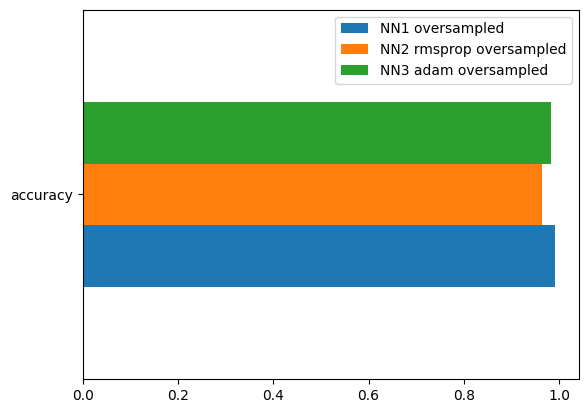

In [177]:
model_accuracy_scores_oversampled = {
    'NN1 oversampled': accuracy_score_oversampled,
    'NN2 rmsprop oversampled': acc2_rmsprop_oversampled,
    'NN3 adam oversampled': acc3_adam_oversampled
}
model_compare_accuracy_oversampled = pd.DataFrame(model_accuracy_scores_oversampled, index=["accuracy"])
model_compare_accuracy_oversampled.plot(kind='barh',)

<Axes: >

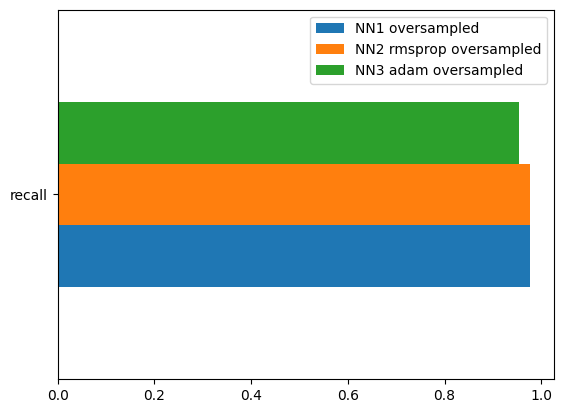

In [178]:
model_recall_scores_oversampled = {
    'NN1 oversampled': recall_oversampled,
    'NN2 rmsprop oversampled': recall2_rmsprop_oversampled,
    'NN3 adam oversampled': recall3_adam_oversampled
}
model_compare_recall_oversampled = pd.DataFrame(model_recall_scores_oversampled, index=["recall"])
model_compare_recall_oversampled.plot(kind='barh',)